Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [6]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [7]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [8]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[ 2.1] [[-0.5 -0.1]]
Accuracy score:  1.0


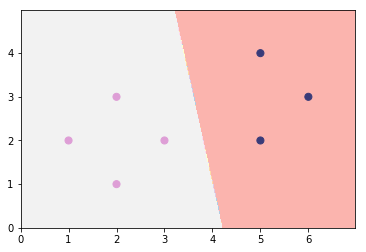

In [9]:
ridge_classifier = RidgeClassifier(0).fit(seven_X,seven_y)
print(ridge_classifier.intercept_,ridge_classifier.coef_)
h = ridge_classifier.predict(seven_X)
print("Accuracy score: ",accuracy_score(seven_y, h))
mlutils.plot_2d_clf_problem(seven_X, seven_y, ridge_classifier.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Accuracy score:  1.0


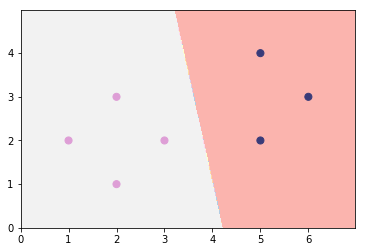

In [10]:
linear_regression = LinearRegression().fit(seven_X,seven_y)
print("Accuracy score: ",accuracy_score(seven_y, h))
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : linear_regression.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [11]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score:  0.875


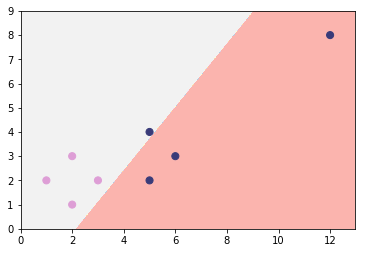

In [12]:
ridge_classifier = RidgeClassifier(0).fit(outlier_X,outlier_y)
h = ridge_classifier.predict(outlier_X)
print("Accuracy score: ",accuracy_score(outlier_y, h))
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, ridge_classifier.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [13]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score:  0.875


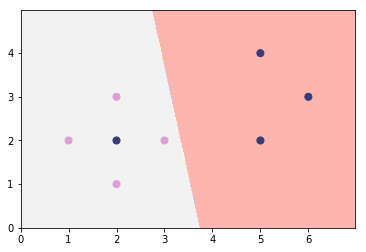

In [14]:
ridge_classifier = RidgeClassifier(0).fit(unsep_X,unsep_y)
h = ridge_classifier.predict(unsep_X)
print("Accuracy score: ",accuracy_score(unsep_y, h))
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, ridge_classifier.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

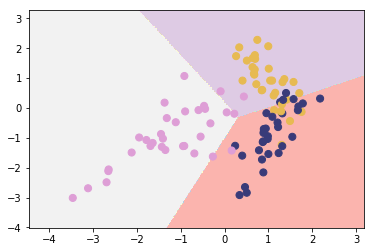

In [15]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=2, n_redundant=0,n_classes=3, n_clusters_per_class=1)
ridge = RidgeClassifier().fit(X,y)
mlutils.plot_2d_clf_problem(X,y,ridge.predict)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

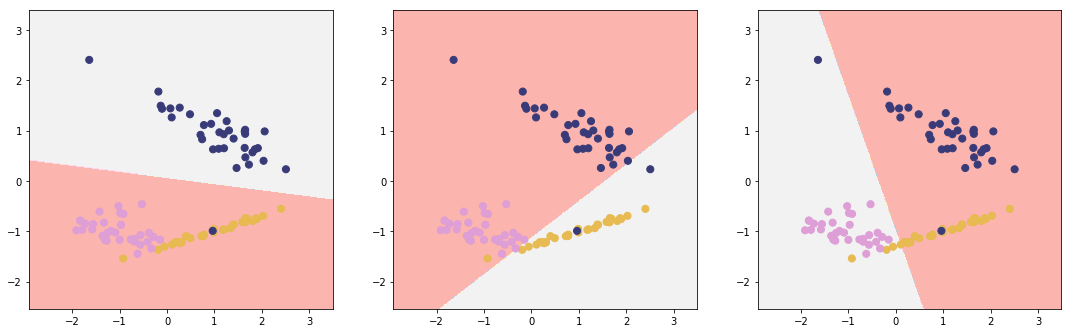

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3)

X,y = make_classification(n_features=2, n_redundant=0,n_classes=3, n_clusters_per_class=1)
y1,y2,y3 = [],[],[]

y1 = [1 if j == 0 else 0 for j in y]
y2 = [1 if j == 1 else 0 for j in y]
y3 = [1 if j == 2 else 0 for j in y]

h1 = LinearRegression().fit(X,y1)
plt.subplot(1, 3, 1)
mlutils.plot_2d_clf_problem(X,y,lambda x: h1.predict(x) >= 0.5)

h2 = LinearRegression().fit(X,y2)
plt.subplot(1, 3, 2)
mlutils.plot_2d_clf_problem(X,y, lambda x: h2.predict(x) >= 0.5)

h3 = LinearRegression().fit(X,y3)
plt.subplot(1, 3, 3)
mlutils.plot_2d_clf_problem(X,y,lambda x: h3.predict(x) >= 0.5)

fig.subplots_adjust(hspace=1)
fig.set_size_inches(18.5, 5.5, forward=True)
plt.show()

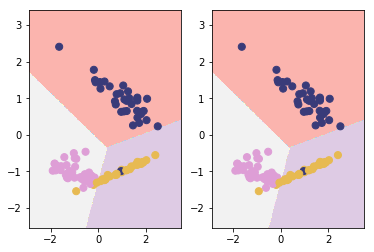

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ridge = RidgeClassifier().fit(X,y)

plt.subplot(1, 2, 1)
mlutils.plot_2d_clf_problem(X,y,lambda x: argmax([h1.predict(x.reshape(1,-1)), h2.predict(x.reshape(1,-1)), h3.predict(x.reshape(1,-1))]))

plt.subplot(1, 2, 2)
mlutils.plot_2d_clf_problem(X,y,ridge.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [18]:
def sigm(x, a=1):
    return 1/(1+exp(-a*x))

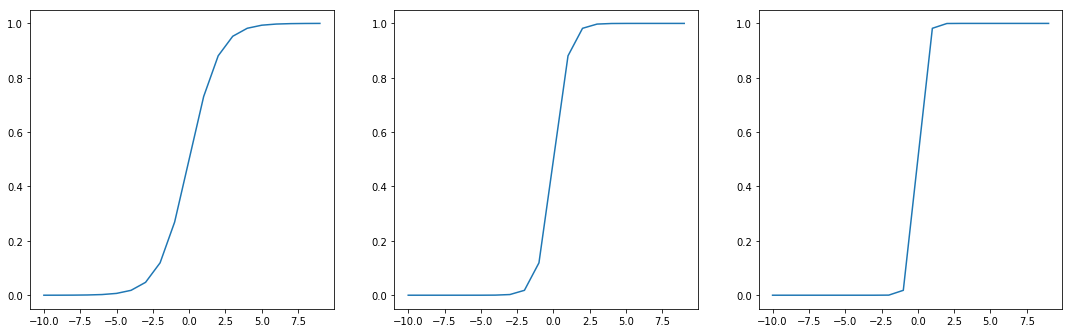

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3)

plt.subplot(1, 3, 1)
plt.plot(range(-10,10), [sigm(x) for x in range(-10,10)])

plt.subplot(1, 3, 2)
plt.plot(range(-10,10), [sigm(x,2) for x in range(-10,10)])

plt.subplot(1, 3, 3)
plt.plot(range(-10,10), [sigm(x,4) for x in range(-10,10)])

fig.set_size_inches(18.5, 5.5, forward=True)
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
def lr_h(x,w):
    return sigm(x.dot(w))

def cross_entropy_loss(h_x, y):
    return -y * np.log(h_x) - (1 - y) * np.log(1 - h_x)
                
def cross_entropy_error(X, y, w):
    result = 0
    for i in range(len(y)):
        h = lr_h(X[i],w)
        result += cross_entropy_loss(h, y[i])
    return result/len(y)

In [22]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    W = []
    dm = PolynomialFeatures(1).fit_transform(X,y)
    w = np.zeros(len(dm[0]))
    iter_num = 0
    err_init = epsilon**-1
    
    while iter_num < max_iter:
        err = 0
        iter_num += 1
        d_w = np.zeros(len(dm[0]))
        d_w0 = 0
        for i in range(len(y)):
            h = lr_h(dm[i],w)
            d_w0 = d_w0 + h - y[i]
            d_w = d_w + (h-y[i])*(dm[i])
            err += cross_entropy_loss(h,y[i])
            
        if abs(err_init - err) < epsilon: 
            print ('Stopped at iteration = ', iter_num)
            break
        
        else: err_init = err
        
        w0 = w[0] - eta*d_w0
        w = w*(1-eta*alpha) - eta*d_w
        w[0] = w0
        W.append(w)
    
    if trace: return (w,W)
    return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 6.44150959 -2.11012128  0.53522851]
Cross entropy error:  0.0775171825249


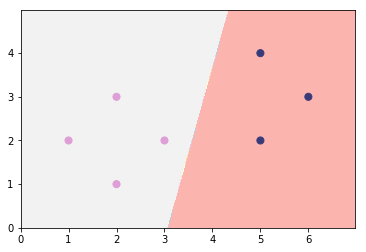

In [24]:
w, W = lr_train(seven_X,seven_y, trace=True)
print(w)
print("Cross entropy error: ", cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X),seven_y,w))
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(PolynomialFeatures(1).fit_transform(x.reshape(1,-1)), w) > 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [25]:
from sklearn.metrics import zero_one_loss
def classification_error(X,y,w):
    X = PolynomialFeatures(1).fit_transform(seven_X)
    h = []
    for i in range(len(y)):
        h.append(lr_h(X[i],w) >= 0.5)
    return zero_one_loss(y,h)

Stopped at iteration =  1545
Stopped at iteration =  1129


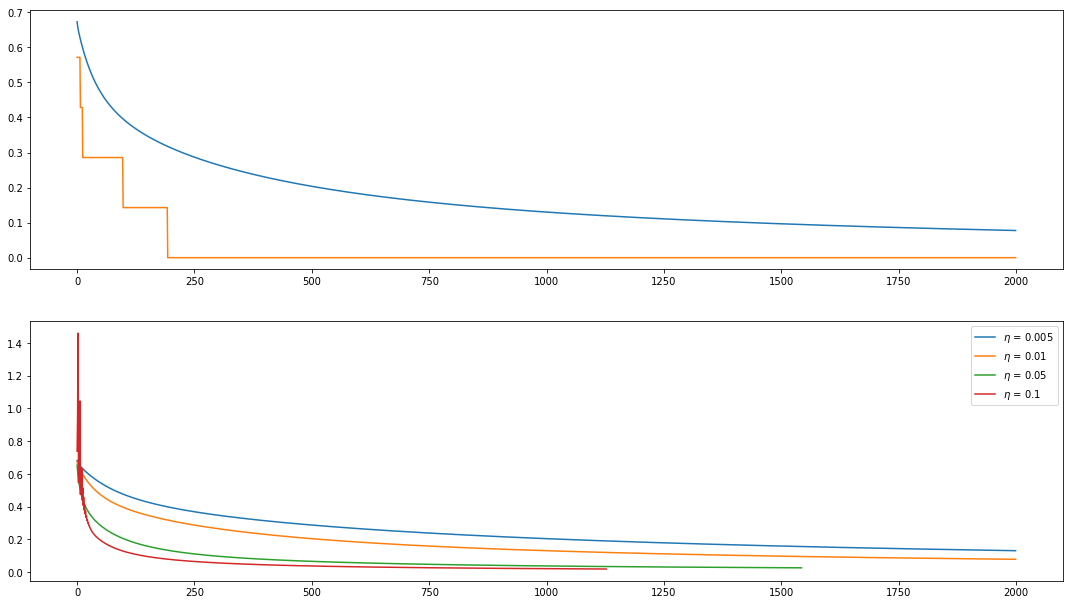

In [26]:
eta = [0.005,0.01,0.05,0.1]

w,W = lr_train(X=seven_X, y=seven_y, trace=True)
X = PolynomialFeatures(1).fit_transform(seven_X)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(range(len(W)), [cross_entropy_error(X, seven_y, i) for i in W])
plt.plot(range(len(W)), [classification_error(X, seven_y, i) for i in W])

plt.subplot(2, 1, 2)

for n in eta:
    w,W = lr_train(seven_X, seven_y, eta=n, trace=True)
    X = PolynomialFeatures(1).fit_transform(seven_X)
    plt.plot(range(len(W)), [cross_entropy_error(X, seven_y, i) for i in W], label = '$\eta$ = ' + str(n))
    
fig.set_size_inches(18.5, 10.5, forward=True)
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

[ 3.47882547] [[-1.35377287  0.52788017]]


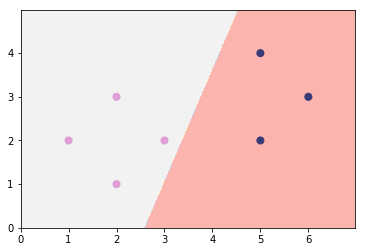

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, tol=0.0001, C=10).fit(seven_X,seven_y)
print(lr.intercept_,lr.coef_)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x: lr.predict(x) >= 0.5)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

[ 3.4807952] [[-1.35427564  0.52758618]]


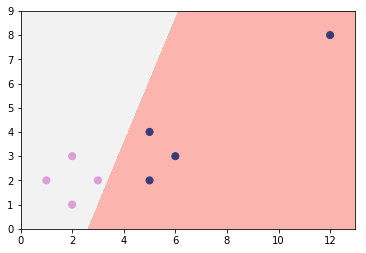

In [28]:
lr = LogisticRegression(max_iter=2000, tol=0.0001, C=10).fit(outlier_X,outlier_y)
print(lr.intercept_,lr.coef_)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,lambda x: lr.predict(x) >= 0.5)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


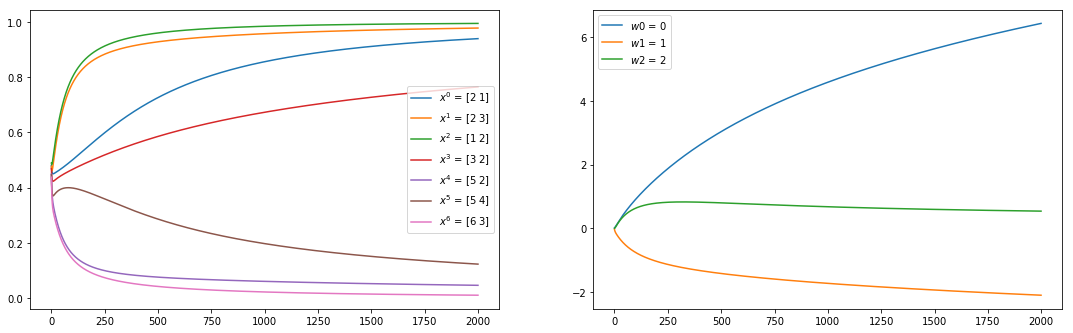

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2)
w,W = lr_train(X=seven_X, y=seven_y, trace=True)

X = PolynomialFeatures(1).fit_transform(seven_X, seven_y)

plt.subplot(1, 2, 1)
for i in range(seven_X.shape[0]):
    plt.plot(range(len(W)), [lr_h(X[i],j) for j in W], label='$x^{%d}$ = ' % i + str(seven_X[i]))
plt.legend()    

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(range(len(W)), [j[i] for j in W], label='$w{%d}$ = ' % i + str(i))
    
fig.set_size_inches(18.5, 5.5, forward=True)    
plt.legend()
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Stopped at iteration =  1316


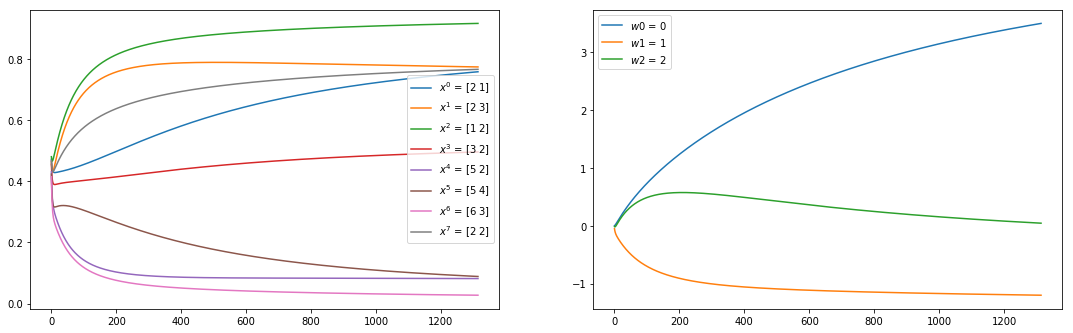

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2)
w,W = lr_train(X=unsep_X, y=unsep_y, trace=True)

X = PolynomialFeatures(1).fit_transform(unsep_X, unsep_y)

plt.subplot(1, 2, 1)
for i in range(unsep_X.shape[0]):
    plt.plot(range(len(W)), [lr_h(X[i],j) for j in W], label='$x^{%d}$ = ' % i + str(unsep_X[i]))
plt.legend()    

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(range(len(W)), [j[i] for j in W], label='$w{%d}$ = ' % i + str(i))
    
fig.set_size_inches(18.5, 5.5, forward=True)    
plt.legend()
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [31]:
from numpy.linalg import norm

Stopped at iteration =  773
Stopped at iteration =  231


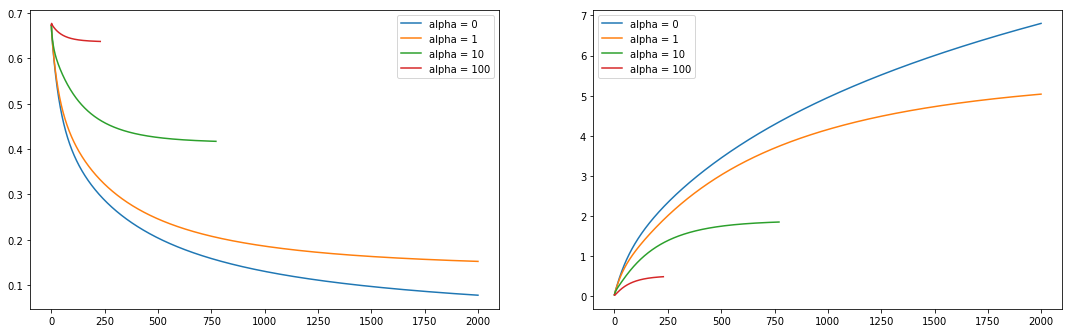

In [32]:
alphas = [0,1,10,100]
fig, ax = plt.subplots(nrows=1, ncols=2)

X = PolynomialFeatures(1).fit_transform(seven_X)
errors, L2, W_list = [],[],[]

for a in alphas:
    w,W = lr_train(seven_X, seven_y, alpha=a, trace=True)
    W_list.append(W)
    errors.append([cross_entropy_error(X, seven_y, i) for i in W])
    L2.append([norm(i) for i in W])
    
plt.subplot(1,2,1)
for e,a,w in zip(errors,alphas,W_list):
    plt.plot(range(len(w)), e, label = 'alpha = ' + str(a))
plt.legend()

plt.subplot(1,2,2)
for l,a,w in zip(L2,alphas,W_list):
    plt.plot(range(len(w)), l, label = 'alpha = ' + str(a))
plt.legend()

fig.set_size_inches(18.5, 5.5, forward=True)    
plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [33]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

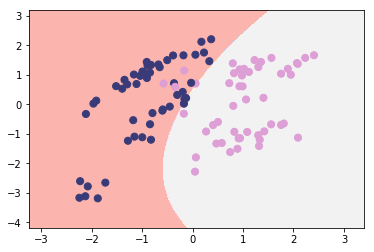

In [34]:
X,y = make_classification(n_samples=100,n_features=2,n_clusters_per_class=2,n_classes=2,n_redundant=0)
d_2 = PolynomialFeatures(2)
d_2.fit(X)
phi = d_2.fit_transform(X)
model = LinearRegression()
model.fit(phi,y)

mlutils.plot_2d_clf_problem(X,y, lambda x : model.predict(d_2.transform(x)) >= 0.5)

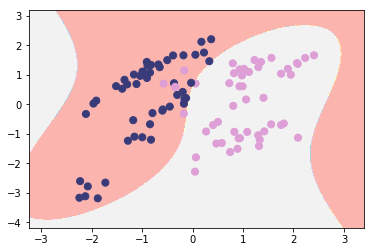

In [35]:
d_3 = PolynomialFeatures(3)
d_3.fit(X)
phi = d_3.fit_transform(X)
model = LinearRegression()
model.fit(phi,y)

mlutils.plot_2d_clf_problem(X,y, lambda x : model.predict(d_3.transform(x)) >= 0.5)

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?